# Introduction to Cartopy

___

## Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature

#  Suppress warnings issued by Cartopy when downloading data files
warnings.filterwarnings('ignore')

___

## Basic concepts: map projections and `GeoAxes`

### Extend Matplotlib's `axes` into georeferenced `GeoAxes`

Recall that in Matplotlib, what we might tradtionally term a *figure* consists of two key components: a `figure` and an associated subplot `axes` instance.

By virtue of importing Cartopy, we can now convert the `axes` into a `GeoAxes` by specifying a projection that we have imported from *Cartopy's Coordinate Reference System* class as `ccrs`. This will effectively *georeference* the subplot.

### Create a map with a specified projection

Here we'll create a GeoAxes that uses the `PlateCarree` projection (basically a global lat-lon map projection, which translates from French to "flat square" in English, where each point is equally spaced in terms of degrees).

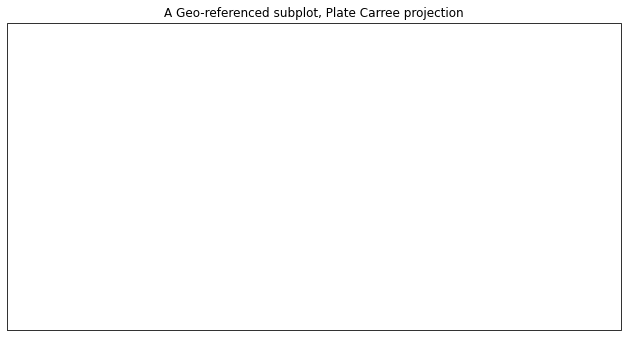

In [2]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-75))
ax.set_title("A Geo-referenced subplot, Plate Carree projection");

Although the figure seems empty, it has in fact been georeferenced, using one of Cartopy's map projections that is provided by Cartopy's `crs` (coordinate reference system) class. We can now add in cartographic features, in the form of *shapefiles*, to our subplot. One of them is `coastlines`, which is a callable `GeoAxes` method that can be plotted directly on our subplot.

In [3]:
ax.coastlines()

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    To get the figure to display again with the features that we've added since the original display, just type the name of the Figure object in its own cell.
</div>

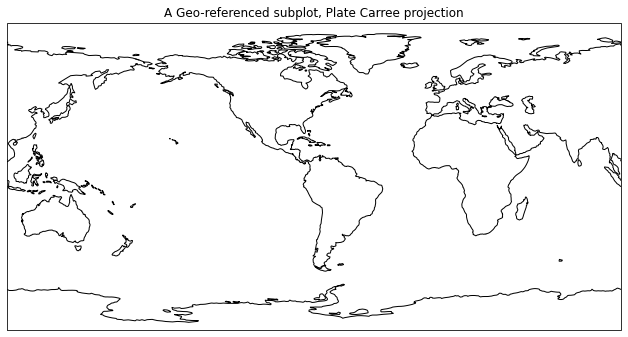

In [4]:
fig

### Add cartographic features to the map

Cartopy provides other cartographic features via its `features` class, which we've imported as `cfeature`. These are also shapefiles, downloaded on initial request from https://www.naturalearthdata.com/. Once downloaded, they "live" in your `~/.local/share/cartopy` directory (note the `~` represents your <i>home</i> directory).

We add them to our subplot via the `add_feature` method. We can define attributes for them in a manner similar to Matplotlib's `plot` method. A list of the various Natural Earth shapefiles appears in https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html .

In [5]:
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')

Once again, referencing the `Figure` object will re-render the figure in the notebook, now including the two features.

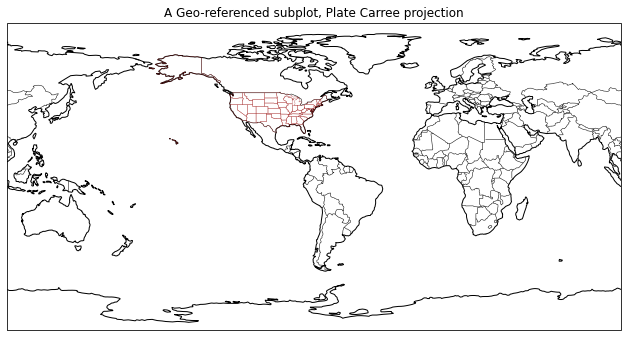

In [6]:
fig

## Explore some of Cartopy's map projections

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    You can find a list of supported projections in Cartopy, with examples, at <a href="https://scitools.org.uk/cartopy/docs/latest/reference/crs.html">https://scitools.org.uk/cartopy/docs/latest/reference/crs.html</a>
</div>

### Mollweide Projection (often used with global satellite mosaics)

This time, we'll define an object to store our projection definition. Any time we wish to use this particular projection later in the notebook, we can use the object name rather than repeating the same call to `ccrs`.

Text(0.5, 1.0, 'Mollweide Projection')

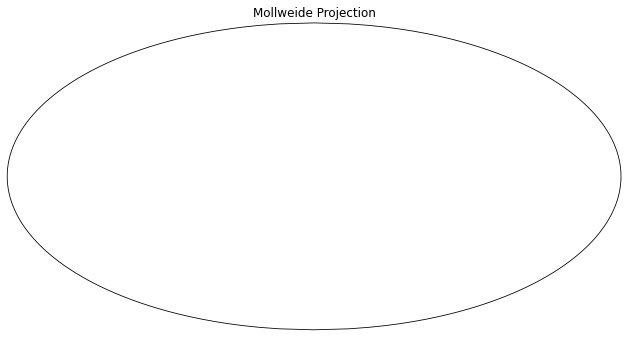

In [7]:
fig = plt.figure(figsize=(11, 8.5))
projMoll = ccrs.Mollweide(central_longitude=0)
ax = plt.subplot(1, 1, 1, projection=projMoll)
ax.set_title("Mollweide Projection")

#### Add in the cartographic shapefiles

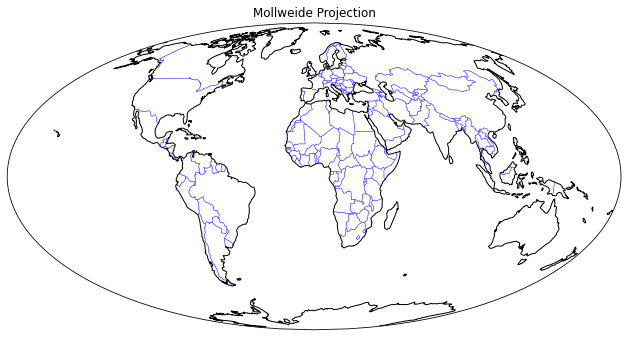

In [8]:
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')
fig

#### Add a fancy background image to the map.

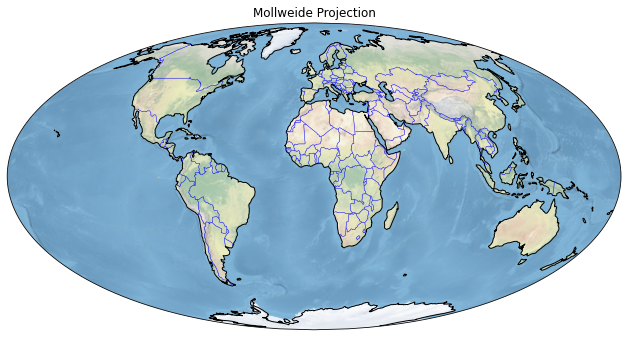

In [9]:
ax.stock_img()
fig

### Lambert Azimuthal Equal Area Projection

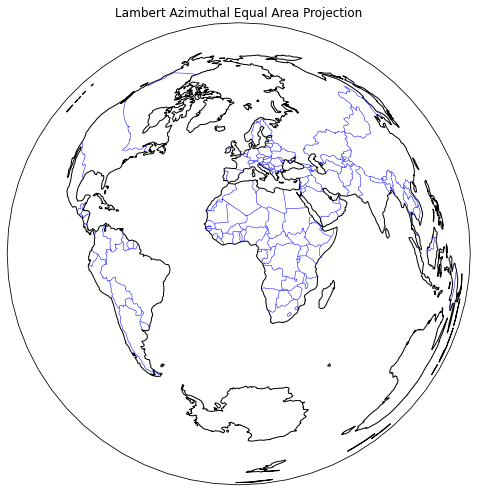

In [10]:
fig = plt.figure(figsize=(11, 8.5))
projLae = ccrs.LambertAzimuthalEqualArea(central_longitude=0.0, central_latitude=0.0)
ax = plt.subplot(1, 1, 1, projection=projLae)
ax.set_title("Lambert Azimuthal Equal Area Projection")
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');

## Create regional maps

### Cartopy's `set_extent` method

Now, let's go back to PlateCarree, but let's use Cartopy's `set_extent` method to restrict the map coverage to a North American view. Let's also choose a lower resolution for coastlines, just to illustrate how one can specify that. Plot lat/lon lines as well.

Reference for Natural Earth's three resolutions (10m, 50m, 110m; higher is coarser): https://www.naturalearthdata.com/downloads/ 

In [11]:
projPC = ccrs.PlateCarree()
lonW = -140
lonE = -40
latS = 15
latN = 65
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'

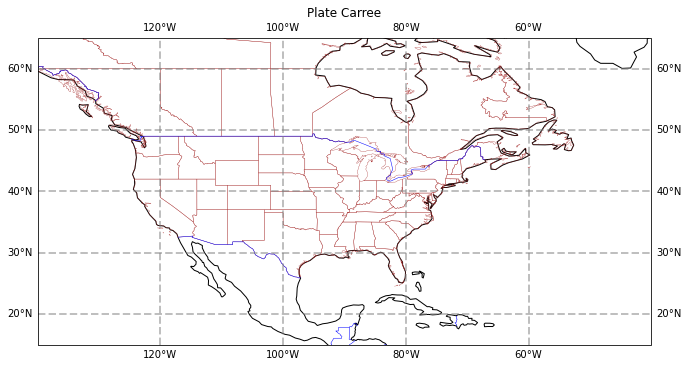

In [12]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projPC)
ax.set_title('Plate Carree')
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.coastlines(resolution=res, color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Note the in the `set_extent` call, we specified <strong>PlateCarree</strong>. This ensures that the values we passed into `set_extent` will be <i>transformed</i> from degrees into the values appropriate for the projection we use for the map.
</div>

The PlateCarree projection exaggerates the spatial extent of regions closer to the poles. Let's try a couple different projections. 

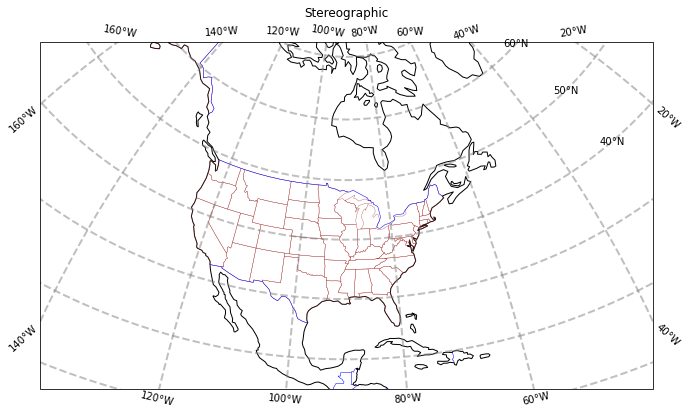

In [13]:
projStr = ccrs.Stereographic(central_longitude=cLon, central_latitude=cLat)
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projStr)
ax.set_title('Stereographic')
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.coastlines(resolution=res, color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');

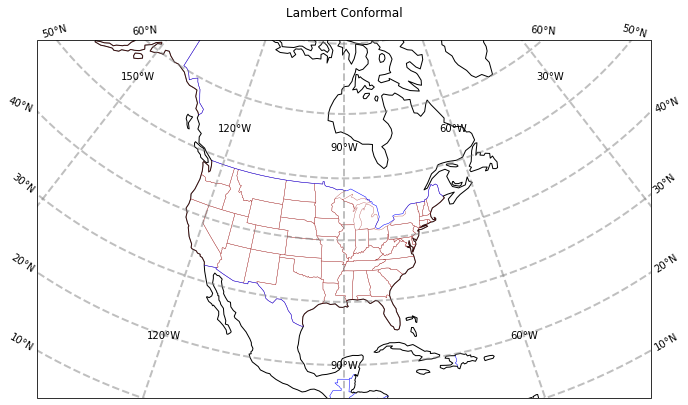

In [14]:
projLcc = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projLcc)
ax.set_title('Lambert Conformal')
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.coastlines(resolution='110m', color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
# End last line with a semicolon to suppress text output to the screen
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Lat/lon labeling for projections other than Mercator and PlateCarree is a recent addition to Cartopy. As you can see, work still needs to be done to improve the placement of labels.
</div>

### Create a regional map centered over New York State 

Set the domain for defining the plot region. We will use this in the `set_extent` line below. Since these coordinates are expressed in degrees, they correspond to the PlateCarree projection.

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Be patient: with a limited regional extent as specified here, the highest resolution (10m) shapefiles are used; as a result (as with any `GeoAxes` object that must be transformed from one coordinate system to another, a subject for a subsequent notebook), this will take longer to plot, particularly if you haven't previously retrieved these features from the Natural Earth shapefile server.
</div>

In [15]:
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -71.5
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
projLccNY = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

### Add some pre-defined Features

Some pre-defined Features exist as `cartopy.feature` constants. The resolution of these pre-defined Features will depend on the areal extent of your map, which you specify via `set_extent`.

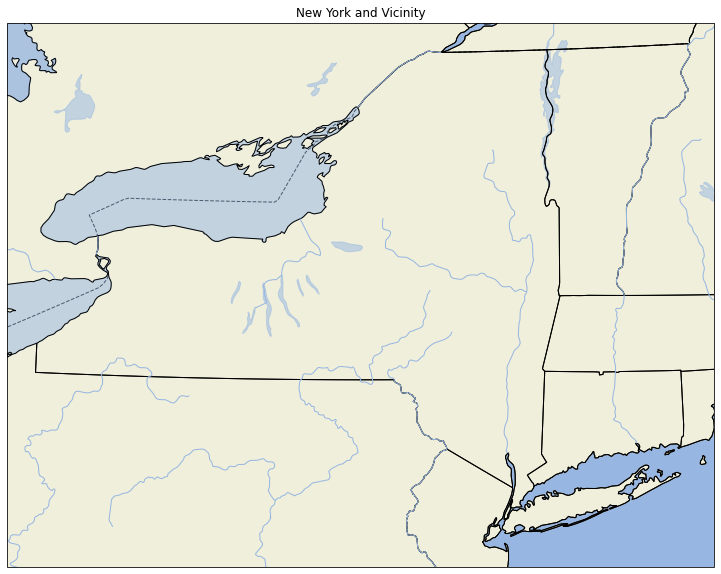

In [16]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 1, 1, projection=projLccNY)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.set_facecolor(cfeature.COLORS['water'])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.set_title('New York and Vicinity');

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note:</p>
    For high-resolution Natural Earth shapefiles such as this, while we could add Cartopy's <code>OCEAN</code> feature, it currently takes <i>much longer</i> to render on the plot (try it yourself to see!). Instead, we take the strategy of first setting the facecolor of the entire <code>Axes</code> to match that of water bodies in Cartopy. When we then layer on the <code>LAND</code> feature, pixels that are not part of the <code>LAND</code> shapefile remain in the <code>water</code> facecolor, which is the same color as the <code>OCEAN</code> .
</div>

### Use lower resolution shapefiles from Natural Earth

Let's create a new map, but this time use lower-resolution shapefiles from Natural Earth, and also eliminate plotting the country borders.

Notice this is a bit more involved. First we create objects for our lower-resolution shapefiles via the `NaturalEarthFeature` method from Cartopy's `feature` class, and then we add them to the map with `add_feature`.

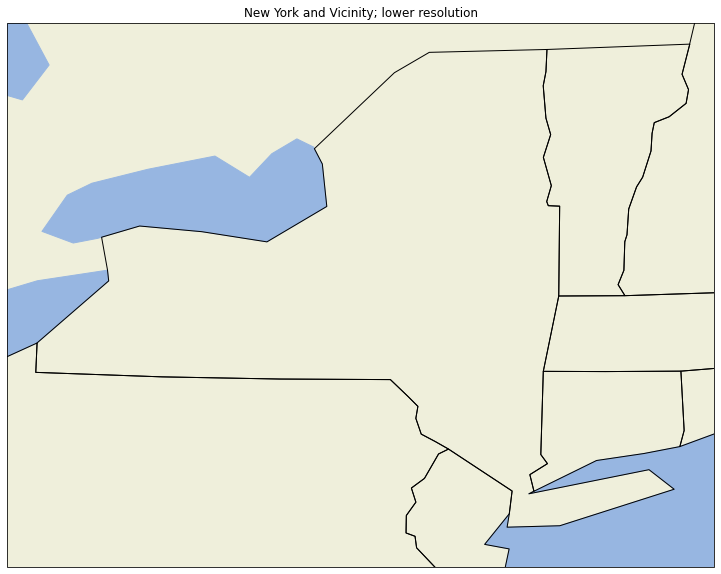

In [17]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 1, 1, projection=projLccNY)
ax.set_extent((lonW, lonE, latS, latN), crs=projPC)

# The features with names such as cfeature.LAND, cfeature.OCEAN, are higher-resolution (10m)
# shapefiles from the Naturalearth repository.  Lower resolution shapefiles (50m, 110m) can be
# used by using the cfeature.NaturalEarthFeature method as illustrated below.

resolution = '110m'

land_mask = cfeature.NaturalEarthFeature(
    'physical',
    'land',
    scale=resolution,
    edgecolor='face',
    facecolor=cfeature.COLORS['land'],
)
sea_mask = cfeature.NaturalEarthFeature(
    'physical',
    'ocean',
    scale=resolution,
    edgecolor='face',
    facecolor=cfeature.COLORS['water'],
)
lake_mask = cfeature.NaturalEarthFeature(
    'physical',
    'lakes',
    scale=resolution,
    edgecolor='face',
    facecolor=cfeature.COLORS['water'],
)
state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lakes',
    scale=resolution,
    facecolor='none',
)

ax.add_feature(land_mask)
ax.add_feature(sea_mask)
ax.add_feature(lake_mask)
ax.add_feature(state_borders, linestyle='solid', edgecolor='black')
ax.set_title('New York and Vicinity; lower resolution');

### A figure with two different regional maps

Finally, let's create a figure with two subplots. On one, we'll repeat our hi-res NYS map; on the second, we'll plot over a different part of the world.

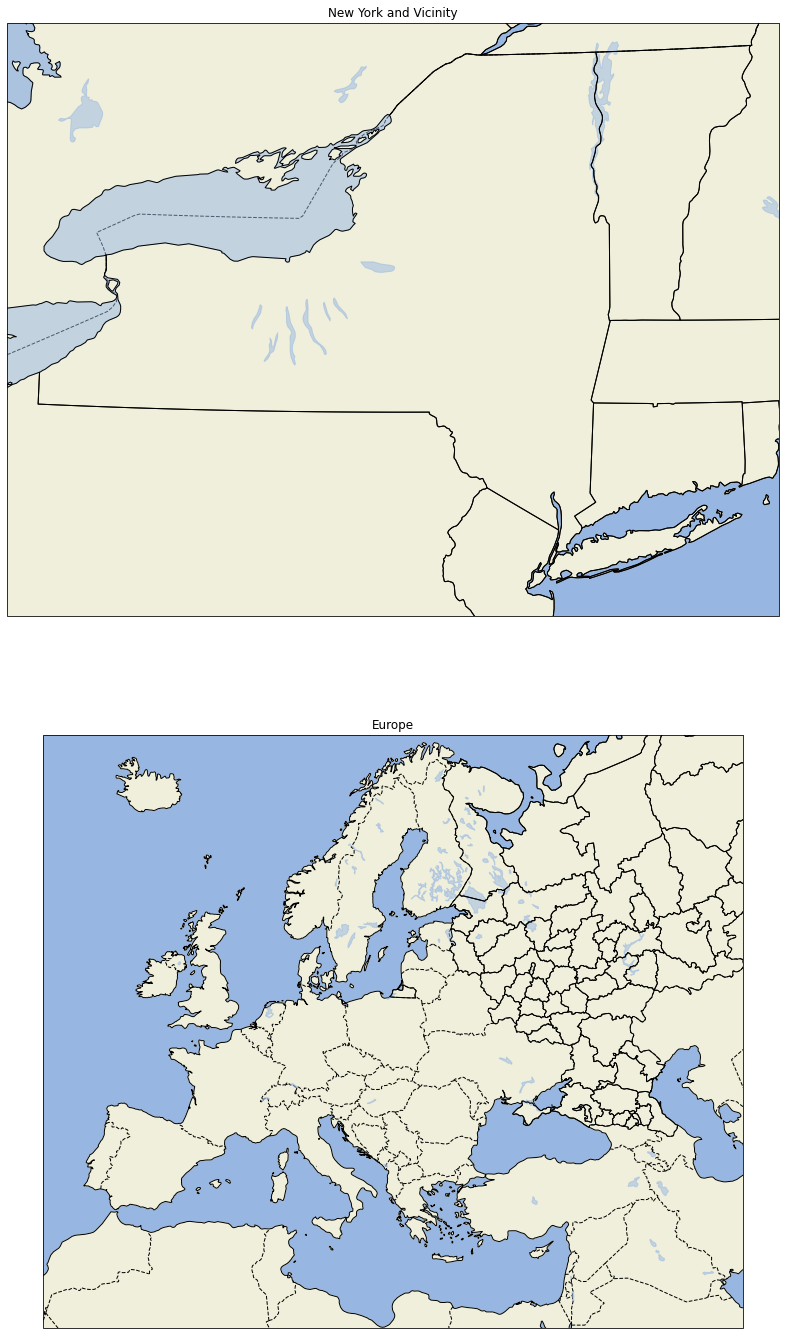

In [18]:
# Create the figure object
fig = plt.figure(
    figsize=(30, 24)
)  # Notice we need a bigger "canvas" so these two maps will be of a decent size

# First subplot
ax = plt.subplot(2, 1, 1, projection=projLccNY)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.set_facecolor(cfeature.COLORS['water'])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.STATES)
ax.set_title('New York and Vicinity')

# Set the domain for defining the second plot region.
latN = 70
latS = 30.2
lonW = -10
lonE = 50
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2

projLccEur = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

# Second subplot
ax2 = plt.subplot(2, 1, 2, projection=projLccEur)
ax2.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax2.set_facecolor(cfeature.COLORS['water'])
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle='--')
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.add_feature(cfeature.STATES)
ax2.set_title('Europe');

## An example of plotting data

First, we'll create a lat-lon grid and define some data on it.

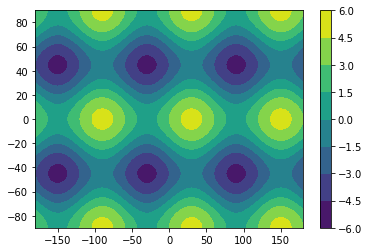

In [19]:
lon, lat = np.mgrid[-180:181, -90:91]
data = 2 * np.sin(3 * np.deg2rad(lon)) + 3 * np.cos(4 * np.deg2rad(lat))
plt.contourf(lon, lat, data)
plt.colorbar();

Plotting data on a Cartesian grid is equivalent to plotting data in the Plate Carree projection, where meridians and parallels are all straight lines with constant spacing. As a result of this simplicity, the global datasets we use often begin in the Plate Carree projection.

Once we create our map again, we can plot this data as a contour map. We also need to specify the projection we are transforming _from_ (i.e. the projection our data is currently in) using the `transform` argument. Let's plot our data in the Mollweide projection to see how shapes change under a transformation.

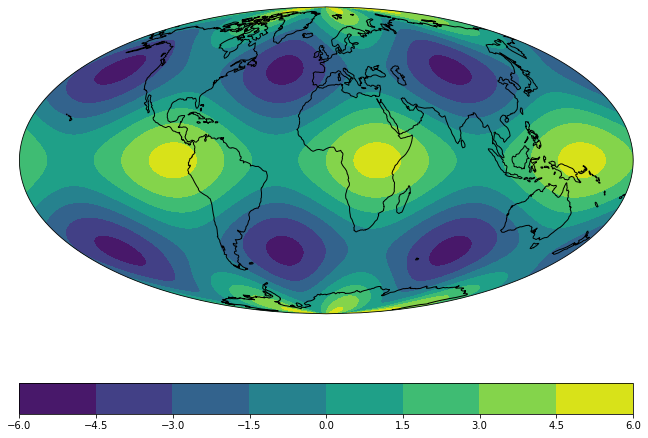

In [20]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projMoll)
ax.coastlines()
dataplot = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())
plt.colorbar(dataplot, orientation='horizontal');

___

## Summary

- Cartopy allows for georeferencing Matplotlib `axes` objects.
- Cartopy's `crs` class supports a variety of map projections.
- Cartopy's `feature` class allows for a variety of cartographic features to be overlaid on the figure.

___

## Resources and References

1. [Cartopy Documentation](https://scitools.org.uk/cartopy/docs/latest/)
2. [Full list of projections in Cartopy](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html) 
3. [Maps with Cartopy (Ryan Abernathey)](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)
4. [Map Projections (GeoCAT)](https://geocat-examples.readthedocs.io/en/latest/gallery/index.html#map-projections)
5. [NCAR xdev Cartopy Tutorial Video](https://www.youtube.com/watch?v=ivmd3RluMiw)